# Ejercicio 1 (Carros)

Primero carguemos los datos y veamos los datos con los que contamos

In [ ]:
import pandas as pd

# Cargar el archivo
file_path = "carc B.txt"
df = pd.read_csv(file_path, sep=" ", header=None, names=["Region", "MPG"])

df.head(10)


,Region,MPG
0,1,22
1,1,17
2,1,22
3,2,17
4,2,23
5,2,25
6,1,20
7,1,15
8,1,18
9,1,26


Procedemos a ordenar los dato, pero sobre la columna de MPG, para ver los minimos y los maximos . Ademas encontar otras estadisticas

In [3]:
df_sorted = df.sort_values(by=["Region", "MPG"]).reset_index(drop=True)
df_sorted

,Region,MPG
0,1,12
1,1,12
2,1,14
3,1,14
4,1,14
...,...,...
69,3,28
70,3,30
71,3,31
72,3,35


Ahora dividimos los datos por región donde 1 = Japón, 2 = Norteamérica, 3 = Europa

In [9]:
# 1 = Japón, 2 = Norteamérica, 3 = Europa
japan = df[df["Region"] == 1]["MPG"]
na = df[df["Region"] == 2]["MPG"]
eu = df[df["Region"] == 3]["MPG"]

print("\n---  Datos de Japon ---")
print(japan.head(10))
print("\n---  Datos de Norteamérica ---")
print(na.head(10))
print("\n---  Datos de Europa ---")
print(eu.head(10))


---  Datos de Japon ---
0     22
1     17
2     22
6     20
7     15
8     18
9     26
10    20
11    16
12    19
Name: MPG, dtype: int64

---  Datos de Norteamérica ---
3     17
4     23
5     25
30    21
52    14
64    28
69    25
70    41
71    25
72    23
Name: MPG, dtype: int64

---  Datos de Europa ---
22    23
23    35
24    24
25    21
33    25
34    28
38    30
65    35
66    18
67    31
Name: MPG, dtype: int64


Ahora calculamos lo siguiente: 

**Mínimo**

Definición:

$$
x^*_{\text{min}} = \min(x_1, x_2, \dots, x_n)
$$

---

**Máximo**

Definición:

$$
x^*_{\text{max}} = \max(x_1, x_2, \dots, x_n)
$$

In [10]:
print("Japón -> Min:", japan.min(), ", Max:", japan.max())
print("Norteamérica -> Min:", na.min(), ", Max:", na.max())
print("Europa -> Min:", eu.min(), ", Max:", eu.max())

Japón -> Min: 12 , Max: 34
Norteamérica -> Min: 14 , Max: 41
Europa -> Min: 18 , Max: 35


**Mediana**
$$
M = 
\begin{cases} 
x_{\frac{n+1}{2}}, & \text{si } n \text{ es impar}, \\[8pt]
\displaystyle\frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}, & \text{si } n \text{ es par}.
\end{cases}
$$

In [11]:
print("Japón -> Mediana:", japan.median())
print("Norteamérica -> Mediana:", na.median())
print("Europa -> Mediana:", eu.median())


Japón -> Mediana: 19.0
Norteamérica -> Mediana: 23.0
Europa -> Mediana: 25.0


**Primer y tercer cuartil:**

$$
Q_1 = x_{0.25}, \qquad Q_3 = x_{0.75}
$$

In [12]:
print("Japón -> Q1:", japan.quantile(0.25), ", Q3:", japan.quantile(0.75))
print("Norteamérica -> Q1:", na.quantile(0.25), ", Q3:", na.quantile(0.75))
print("Europa -> Q1:", eu.quantile(0.25), ", Q3:", eu.quantile(0.75))

Japón -> Q1: 16.75 , Q3: 22.0
Norteamérica -> Q1: 19.0 , Q3: 25.0
Europa -> Q1: 22.0 , Q3: 30.5


**Rango intercuartílico (IQR):**
$$
\mathrm{IQR} = Q_3 - Q_1
$$

**Límite inferior:**

$$
bL = Q_1 - 1.5\cdot \mathrm{IQR}
$$

**Límite superior:**

$$
bU = Q_3 + 1.5\cdot \mathrm{IQR}
$$

In [13]:
def limits(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    bL = q1 - 1.5*iqr
    bU = q3 + 1.5*iqr
    return bL, bU

print("Japón -> Límites:", limits(japan))
print("Norteamérica -> Límites:", limits(na))
print("Europa -> Límites:", limits(eu))

Japón -> Límites: (np.float64(8.875), np.float64(29.875))
Norteamérica -> Límites: (np.float64(10.0), np.float64(34.0))
Europa -> Límites: (np.float64(9.25), np.float64(43.25))


**Media aritmética:**

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

In [14]:
print("Japón -> Media:", japan.mean())
print("Norteamérica -> Media:", na.mean())
print("Europa -> Media:", eu.mean())

Japón -> Media: 19.826923076923077
Norteamérica -> Media: 23.545454545454547
Europa -> Media: 26.181818181818183


**Boxplot**

<Figure size 800x600 with 0 Axes>

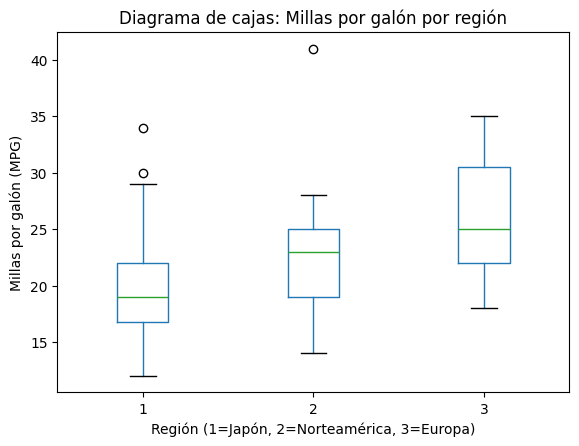

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.boxplot(column="MPG", by="Region", grid=False)
plt.title("Diagrama de cajas: Millas por galón por región")
plt.suptitle("")
plt.xlabel("Región (1=Japón, 2=Norteamérica, 3=Europa)")
plt.ylabel("Millas por galón (MPG)")
plt.show()

# Ejercicio 2 (Billetes)

In [1]:
import pandas as pd

# Cargamos el archivo 
file_path = "SwissBank 1.txt"
df = pd.read_csv(file_path, sep="\t| ", engine="python", header=None)

# Renombrar columnas 
df.columns = ["X1","X2","X3","X4","X5","X6"]

df.head()

,X1,X2,X3,X4,X5,X6
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


In [2]:
# Supongamos: primeras 100 filas genuinos, últimas 100 falsos
genuinos = df.iloc[:100, :]
falsos = df.iloc[100:, :]

genuinos.head(), falsos.head()

(      X1     X2     X3    X4    X5     X6
 0  214.8  131.0  131.1   9.0   9.7  141.0
 1  214.6  129.7  129.7   8.1   9.5  141.7
 2  214.8  129.7  129.7   8.7   9.6  142.2
 3  214.8  129.7  129.6   7.5  10.4  142.0
 4  215.0  129.6  129.7  10.4   7.7  141.8,
         X1     X2     X3    X4    X5     X6
 100  214.4  130.1  130.3   9.7  11.7  139.8
 101  214.9  130.5  130.2  11.0  11.5  139.5
 102  214.9  130.3  130.1   8.7  11.7  140.2
 103  215.0  130.4  130.6   9.9  10.9  140.3
 104  214.7  130.2  130.3  11.8  10.9  139.7)

Boxplot de x1

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_31600\1867850526.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([genuinos["X1"], falsos["X1"]], labels=["Genuinos","Falsos"])


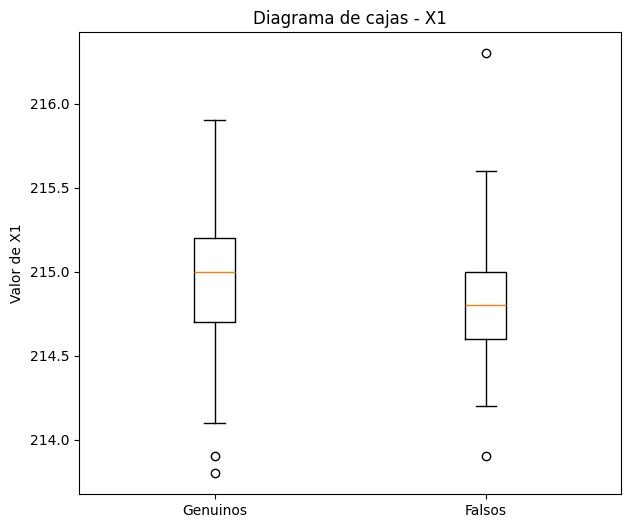

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.boxplot([genuinos["X1"], falsos["X1"]], labels=["Genuinos","Falsos"])
plt.title("Diagrama de cajas - X1")
plt.ylabel("Valor de X1")
plt.show()


Estadistcias a observar 

In [4]:
def stats(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return {
        "M (mediana)": series.median(),
        "Q1 (FL)": q1,
        "Q3 (FU)": q3,
        "Límite inferior (bL)": q1 - 1.5*iqr,
        "Límite superior (bU)": q3 + 1.5*iqr,
        "Mínimo": series.min(),
        "Máximo": series.max(),
        "Media": series.mean()
    }

Calculamos sobre $$X_6$$ lo siguiente toamndo en cuenta las formulas de : 

**Mediana:**

$$
M = 
\begin{cases} 
x_{\frac{n+1}{2}}, & n \text{ impar} \\[6pt]
\frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}, & n \text{ par}
\end{cases}
$$

**Cuartiles:**

$$
Q_1 = x_{0.25}, \qquad Q_3 = x_{0.75}
$$

**Rango intercuartílico:**

$$
IQR = Q_3 - Q_1
$$

**Límites:**

$$
bL = Q_1 - 1.5\cdot IQR, \qquad bU = Q_3 + 1.5\cdot IQR
$$

**Media:**

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$


In [5]:
print("Estadísticas X6 - Genuinos")
print(stats(genuinos["X6"]))

print("\nEstadísticas X6 - Falsos")
print(stats(falsos["X6"]))

Estadísticas X6 - Genuinos
{'M (mediana)': np.float64(141.5), 'Q1 (FL)': np.float64(141.2), 'Q3 (FU)': np.float64(141.8), 'Límite inferior (bL)': np.float64(140.29999999999995), 'Límite superior (bU)': np.float64(142.70000000000005), 'Mínimo': np.float64(139.6), 'Máximo': np.float64(142.4), 'Media': np.float64(141.51700000000002)}

Estadísticas X6 - Falsos
{'M (mediana)': np.float64(139.5), 'Q1 (FL)': np.float64(139.2), 'Q3 (FU)': np.float64(139.8), 'Límite inferior (bL)': np.float64(138.29999999999995), 'Límite superior (bU)': np.float64(140.70000000000005), 'Mínimo': np.float64(137.8), 'Máximo': np.float64(140.6), 'Media': np.float64(139.45)}


Boxplot de $$X_6$$

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_31600\670479829.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([genuinos["X6"], falsos["X6"]], labels=["Genuinos","Falsos"])


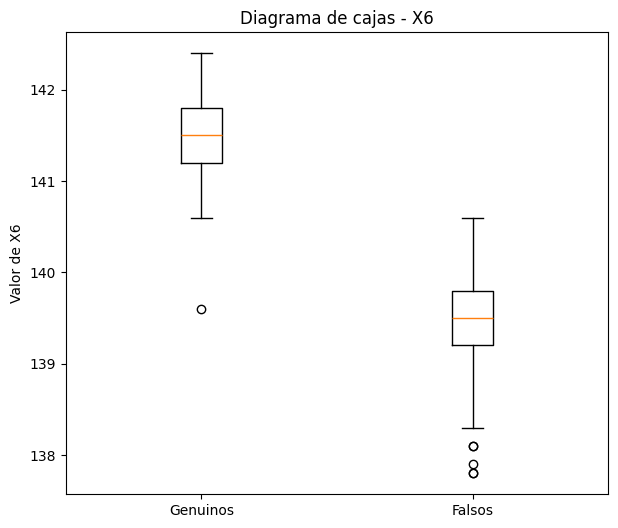

In [6]:
plt.figure(figsize=(7,6))
plt.boxplot([genuinos["X6"], falsos["X6"]], labels=["Genuinos","Falsos"])
plt.title("Diagrama de cajas - X6")
plt.ylabel("Valor de X6")
plt.show()

- Variable X1: Los elementos genuinos y falsos presentan características muy similares en esta variable. Ambos grupos muestran valores centrales aproximados de 215, con patrones de dispersión comparables. Aunque se identificaron algunos valores atípicos, no existe una diferenciación significativa que permita distinguir claramente entre ambos grupos basándose únicamente en esta variable.

- Variable X6: Comparando, esta variable muestra un patrón de separación más definido entre los grupos. Los elementos genuinos presentan valores centrales más elevados (aproximadamente 141.5) con menor variabilidad en sus datos. Por otro lado, los elementos falsos exhiben valores centrales inferiores (alrededor de 139.5) acompañados de mayor dispersión y presencia de valores atípicos.

Veamos que los resultados sugieren que la variable X1 no es un indicador confiable para la clasificación entre elementos genuinos y falsos, ya que ambos grupos presentan distribuciones muy similares. Sin embargo, la variable X6 demuestra ser un mejor diferenciador, ya que podemos ver una separación clara entre los grupos, donde los elementos genuinos tienen valores superiores comparados con los falsos.